Processing file: file.tsv


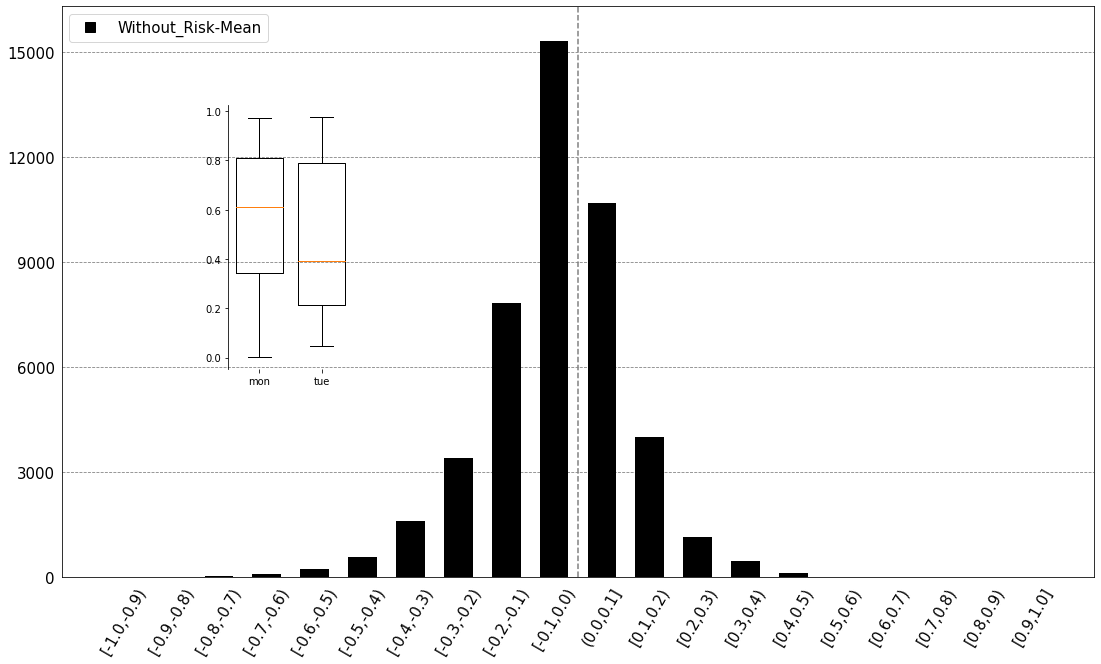

In [72]:
##@title
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import sys, glob



def nextk(n, k=10):
    if n < 0:
        return -1 * (abs(n) + (k - abs(n) % k))
    if (n % k):
        return n + (k - n % k)
    return n
    


# if __name__ == '__main__':
#     name_file = sys.argv[1]
#     if len(sys.argv) > 2:
#         k = int(sys.argv[2])
#     else:
#         k = 10
if True:
    name_file = 'file.tsv'
    k = 10
    legends = ['Only_Risk-Mean',
           'Only_Risk-Risk',
           'With_Risk-Mean',
           'With_Risk-Risk',
           'Without_Risk-Mean',
           'Without_Risk-Risk'
           ]
    hash_legends = {'Only_Risk-Mean': 0,
                    'Only_Risk-Risk': 1,
                    'With_Risk-Mean': 2,
                    'With_Risk-Risk': 3,
                    'Without_Risk-Mean': 4,
                    'Without_Risk-Risk': 5
                    }

    k = 10

    files = glob.glob(name_file)

    for file in files:
        if 'table.tsv' in file: continue
        print('Processing file: ' + file)
        my_file_simulation = open(file, 'r')
        # k = 15
        nfator = 100
        separator = '\t'
        rot = 60
        # Para mais de cinco sistemas adicioar mais cores
        #colors = ['#D3D3D3', '#C0C0C0', '#A9A9A9', '#808080', '#696969', '#000000']
        colors = ['#000000', '#696969', '#808080', '#A9A9A9', '#C0C0C0', '#D3D3D3']
        # Defina as legendas conforme a ordem do array
        # barWidth = 0.1 if 'FigIntro' not in file else 0.6
        barWidth = 0.6
        space = 0.0
        all_values = []
        max_diference = 0
        cont = 0

        for line in my_file_simulation:
            line = line.replace('\n', '')
            if cont == 0:
                desorder_legends = line.split(separator)
                cont += 1
                in_legends = [0]*len(legends)
                for leg in desorder_legends:
                    if leg in legends:
                        in_legends[legends.index(leg)] = 1
                novas_legends = []
                for index in range(len(legends)):
                    if in_legends[index] == 1:
                        novas_legends.append(legends[index])
                legends = novas_legends

                ids = 0
                for key in hash_legends:
                    if key in desorder_legends:
                        hash_legends[key] = ids
                        ids += 1
                #print(hash_legends)
                #print(legends)
                continue
            if line == '':
                break
            values = [nfator * float(x) for x in line.split(separator)]
            max_values = max(values)
            min_values = abs(min(values))
            if max_diference < max_values:
                max_diference = max_values
            if max_diference < min_values:
                max_diference = min_values

            ordered_values = [0] * len(values)
            for index in range(len(values)):
                ordered_values[hash_legends[desorder_legends[index]]] = values[index]
            all_values.append(ordered_values)

        minimo_interval = nextk(-1 * max_diference, k)
        maximo_interval = nextk(max_diference, k)
        # n_bins = 2*int(maximo_interval/k)
        # print(minimo_interval)
        # x_labels = np.arange(minimo_interval, maximo_interval, k)
        x_labels = np.arange(-100, 100, k)
        n_bins = x_labels.size
        numEvaluated = len(all_values[0])
        numSystem = len(all_values)
        vet = []
        for i in range(numEvaluated):
            vet.append([0] * n_bins)
        for i in range(numSystem):
            for j in range(numEvaluated):
                flag = True
                for index in range(n_bins - 1):
                    if all_values[i][j] < x_labels[index + 1]:
                        vet[j][index] += 1
                        flag = False
                        break
                if flag:
                    vet[j][-1] += 1
        array_bars = vet
        # Plotting
        numSystems = len(array_bars[0])
        # Calc position of bar on X axis
        position_bars = []
        p1 = np.arange(1, numSystems + 1)
        # print(p1)
        p2 = []
        for i in range(p1.size):
            p2.append(p1[i] + i * space)
            # print(p1[i] + space)
        # print(p1)
        position_bars.append(p2)

        for i in range(1, len(array_bars)):
            temp = [x + barWidth for x in position_bars[i - 1]]
            position_bars.append(temp)

        x = (position_bars[0][int(numSystems / 2)] + position_bars[-1][int(numSystems / 2) - 1]) / 2
        # Make the plot
        y_min = min(array_bars[0])
        y_max = max(array_bars[0])

        fig, ax1 = plt.subplots()

        for index in range(len(array_bars)):
            plt.bar(position_bars[index], array_bars[index], color=colors[index], width=barWidth)
            min_temp = min(array_bars[index])
            if y_min > min_temp:
                y_min = min_temp
            max_temp = max(array_bars[index])
            if y_max < max_temp:
                y_max = max_temp
        # Para colocar intervalos na parte inferior personalizados
        # plt.xticks([r + barWidth for r in range(len(bars1))], ['[-90 -100]', 'B', 'C', 'D', 'E'], rotation=45)
        # plt.xticks([r for r in range(len(bars1))], ['[-90 -100]', 'B', 'C', 'D', 'E'], rotation=45, )
        # define o limite do eixo y até onde desenhei a reta tracejada ao centro
        #plt.plot([x, x], [y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)], '--', color='gray')
        #plt.ylim((y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)))
        plt.plot([x, x], [0, y_max + 1000], '--', color='gray')
        plt.ylim((0, y_max + 1000))
        axes = plt.gca()
        # Coloca as grades cor cinza
        axes.yaxis.grid(color='gray', linestyle='dashed')
        # Coloca as grades atrés dos plots
        axes.set_axisbelow(True)
        # Para mostrar apenas 6 valores de y na barra vertical
        axes.yaxis.set_major_locator(plt.MaxNLocator(6))


        # Para colocar intervalos na parte inferior personalizados
        # axes.xaxis.set_major_locator(plt.MaxNLocator(len(x_labels)))
        def format_func(value, tick_number):
            value = int(value)
            if tick_number == x_labels.size - 1:
                return "[" + str((x_labels[tick_number]) / nfator) + "," + str((x_labels[tick_number] + k) / nfator) + "]"
            elif (x_labels[tick_number]) / nfator == 0:
                return "(" + str((x_labels[tick_number]) / nfator) + "," + str((x_labels[tick_number] + k) / nfator) + "]"
            else:
                return "[" + str((x_labels[tick_number]) / nfator) + "," + str((x_labels[tick_number] + k) / nfator) + ")"


        plt.xticks(np.arange(1, 1 + len(x_labels)))  # , fontsize=15)
        plt.tick_params(labelsize=15)
        axes.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
        plt.xticks(rotation=45)
        # Para remover a posição no eixo do tick
        axes.xaxis.set_ticks_position('none')
        axes.yaxis.set_ticks_position('none')
        # Coloca os x_ticks mais à esquerda
        plt.setp(axes.xaxis.get_majorticklabels(), rotation=rot, ha="center")

        rects = []
        # Faz os quadrados com as cores da caixinhda de legendas para cada tipo
        for index in range(len(array_bars)):
            rects.append(Line2D([], [], marker="s", markersize=10, linewidth=0, color=colors[index]))
        if 'FigIntro' not in file:
            plt.legend(tuple(rects), tuple(legends), fontsize=15, loc='upper left')

        ###
        left, bottom, width, height = [0.25, 0.40, 0.35, 0.35]
        ax2 = fig.add_axes([left, bottom, width, height])
        
        box_vet = [np.random.uniform(0, 1, 100), np.random.uniform(0, 1, 20)]
        ax2.boxplot(box_vet, positions=[0.2,0.6], widths=(0.3, 0.3))#, positions=[0.5,0.8], widths=(0.1, 0.1))
        ax2.set_xticklabels(['mon', 'tue'])#, fontdict=None, minor=False)
        ax2.set_xlim([0, 3])
        # ax2.axis('off') 
        ax2.spines['right'].set_visible(False)
        ax2.spines['top'].set_visible(False)
        ax2.spines['bottom'].set_visible(False)
        #ax2.set_alpha(0.0)
        ax2.patch.set_alpha(0.0)
        
        # extent = ax2.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
        # fig.savefig('ax2_figure.png', bbox_inches=extent)

        ####

        fig = plt.gcf()
        fig.set_size_inches(18.5, 10.5)
        plt.savefig(file.replace('.tsv', '-plot.pdf'), bbox_inches='tight')


        f = open(file.replace('.tsv', '-table.tsv'), 'w+')
        line = "\t"
        for index in range(numEvaluated):
        #for index, leg in enumerate(legends):
            leg = legends[index]
            if index == numEvaluated - 1:
                line = line + leg + "\n"
            else:
                line = line + leg + "\t"

        f.write(line)
        losses = [0] * numEvaluated
        wins = [0] * numEvaluated
        for index, interval in enumerate(x_labels):
            rangeName = format_func(0, index)
            line = rangeName + "\t"
            if (x_labels[index] == 0):
                f.write("\n")
            for index_method in range(numEvaluated):
                if index_method == numEvaluated - 1:
                    line = line + str(vet[index_method][index]) + "\n"
                else:
                    line = line + str(vet[index_method][index]) + "\t"
                if '-' in rangeName: losses[index_method] += vet[index_method][index]
                else: wins[index_method] += vet[index_method][index]
            # print(line)
            f.write(line)
        f.write('\n\nLosses')
        for loss in losses: f.write('\t' + str(loss))
        f.write('\nWins')
        for win in wins: f.write('\t' + str(win))
        f.close()
